## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 


## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

In [1]:
#dependencies
import random
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from config import *
import requests
from pprint import pprint
from citipy import citipy
import matplotlib as mpl
from matplotlib import rcParams

In [5]:
#generate cities list
#longitude (-180,180), latitude (-90,90)
def city_gen(cities, countries):
    '''
    Returns a list of randomly generated lat, lng coordinates and closest city
    '''
    lat, lng = random.uniform(-90, 90), random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    city_name = city.city_name.title()
    country = city.country_code.upper()
    
    if city_name in cities and country in countries:
        #print(f'Found duplicate: {city_name},{country}')
        city_marker = city_gen(cities, countries)[2]
    else:
        city_marker = city_name+','+country
        #print(f'returning {city_marker}')
    return [lat, lng, city_marker]

In [6]:
#request current weather
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#set up number of cities to query
iterator = 1
number_of_cities = 500

#set up lists for storing results
lat = []
lng = []
temp = []
cities = []
countries = []
humidity = []
cloudiness = []
windspeed =[]

#set up text formatting
bold = "\033[1m"
reset = "\033[0;0m"

while iterator <= number_of_cities:
    print(bold + f'Requesting weather for city # {iterator}' + reset)
    #generate random city
    city_g = city_gen(cities, countries)
    
    r = requests.get(query_url + city_g[2])
    print(f'   requested URL: {r.url}')
    
    if r.status_code == 200:
        response = r.json()
        #pprint(response)
        try:
            city = response['name']
            country = response['sys']['country']
            #make sure city is unique
            if  city in cities and country in countries:
                print(f'   {city}, {country} has already been added, retrying with different city...\n')
            else:
                print('   recording weather for ' + bold + f'{city}, {country}' + reset + '\n')
                temp.append(response['main']['temp'])
                lat.append(response['coord']['lat'])
                lng.append(response['coord']['lon'])
                humidity.append(response['main']['humidity'])
                cloudiness.append(response['wind']['speed'])
                windspeed.append(response['clouds']['all'])
                cities.append(city)
                countries.append(country)
                iterator += 1
        except KeyError:
            print('Key is not found')
    elif r.status_code == 404:
        print('   city not found, retrying with different city... \n')
        
print(bold + f'Recorded weather for {len(cities)} cities.' + reset)

Requesting weather for city # 1
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Kapaa,US
   recording weather for Kapaa, US

Requesting weather for city # 2
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Hasaki,JP
   recording weather for Hasaki, JP

Requesting weather for city # 3
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Bengkulu,ID
   city not found, retrying with different city... 

Requesting weather for city # 3
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Attawapiskat,CA
   city not found, retrying with different city... 

Requesting weather for city # 3
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Hilo,US
 

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Busselton,AU
   recording weather for Busselton, AU

Requesting weather for city # 33
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Tiksi,RU
   recording weather for Tiksi, RU

Requesting weather for city # 34
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Grootfontein,NA
   recording weather for Grootfontein, NA

Requesting weather for city # 35
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Lorengau,PG
   recording weather for Lorengau, PG

Requesting weather for city # 36
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Santo%20Augusto,BR
   recording weather for Santo Augus

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Maniitsoq,GL
   recording weather for Maniitsoq, GL

Requesting weather for city # 66
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Rakaia,NZ
   recording weather for Rakaia, NZ

Requesting weather for city # 67
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Kaliua,TZ
   recording weather for Kaliua, TZ

Requesting weather for city # 68
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Port%20Macquarie,AU
   recording weather for Port Macquarie, AU

Requesting weather for city # 69
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Freeport,US
   recording weather for Freeport, US



   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Severo-Kurilsk,RU
   recording weather for Severo-Kurilsk, RU

Requesting weather for city # 97
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Lompoc,US
   recording weather for Lompoc, US

Requesting weather for city # 98
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=New%20Norfolk,AU
   recording weather for New Norfolk, AU

Requesting weather for city # 99
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Pisco,PE
   recording weather for Pisco, PE

Requesting weather for city # 100
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Thinadhoo,MV
   recording weather for Thinadhoo,

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Isiro,CD
   recording weather for Isiro, CD

Requesting weather for city # 128
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Saint-Philippe,RE
   recording weather for Saint-Philippe, RE

Requesting weather for city # 129
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Hithadhoo,MV
   recording weather for Hithadhoo, MV

Requesting weather for city # 130
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Vaini,TO
   recording weather for Vaini, TO

Requesting weather for city # 131
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Don%20Sak,TH
   recording weather for Don Sak, TH

Re

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Yatou,CN
   recording weather for Yatou, CN

Requesting weather for city # 153
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Cacoal,BR
   recording weather for Cacoal, BR

Requesting weather for city # 154
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Tual,ID
   recording weather for Tual, ID

Requesting weather for city # 155
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Chumikan,RU
   recording weather for Chumikan, RU

Requesting weather for city # 156
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Butaritari,KI
   recording weather for Butaritari, KI

Requesting weather

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Kununurra,AU
   recording weather for Kununurra, AU

Requesting weather for city # 183
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sentyabrskiy,RU
   city not found, retrying with different city... 

Requesting weather for city # 183
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Jingdezhen,CN
   recording weather for Jingdezhen, CN

Requesting weather for city # 184
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Pevek,RU
   recording weather for Pevek, RU

Requesting weather for city # 185
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sumbawa,ID
   city not found, retryin

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Saskylakh,RU
   recording weather for Saskylakh, RU

Requesting weather for city # 209
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Belushya%20Guba,RU
   city not found, retrying with different city... 

Requesting weather for city # 209
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ugoofaaru,MV
   recording weather for Ugoofaaru, MV

Requesting weather for city # 210
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Buala,SB
   recording weather for Buala, SB

Requesting weather for city # 211
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Santa%20Cruz,CR
   recording weather

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Champasak,LA
   recording weather for Champasak, LA

Requesting weather for city # 238
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Tsihombe,MG
   city not found, retrying with different city... 

Requesting weather for city # 238
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Caravelas,BR
   recording weather for Caravelas, BR

Requesting weather for city # 239
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sola,VU
   recording weather for Sola, VU

Requesting weather for city # 240
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Arcata,US
   recording weather for Arcata, US

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Polis,CY
   recording weather for Polis, CY

Requesting weather for city # 261
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Celestun,MX
   recording weather for Celestun, MX

Requesting weather for city # 262
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Namibe,AO
   recording weather for Namibe, AO

Requesting weather for city # 263
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sao%20Miguel%20Do%20Araguaia,BR
   recording weather for Sao Miguel do Araguaia, BR

Requesting weather for city # 264
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Quang%20Ngai,VN
   recording we

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Rorvik,NO
   recording weather for Rorvik, NO

Requesting weather for city # 288
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Vostok,RU
   recording weather for Vostok, RU

Requesting weather for city # 289
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Banda%20Aceh,ID
   recording weather for Banda Aceh, ID

Requesting weather for city # 290
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Solnechnyy,RU
   recording weather for Solnechnyy, RU

Requesting weather for city # 291
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Talnakh,RU
   recording weather for Talnakh, RU

Requ

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Zhezkazgan,KZ
   recording weather for Zhezkazgan, KZ

Requesting weather for city # 314
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Taolanaro,MG
   city not found, retrying with different city... 

Requesting weather for city # 314
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Bismarck,US
   recording weather for Bismarck, US

Requesting weather for city # 315
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Dalvik,IS
   recording weather for Dalvik, IS

Requesting weather for city # 316
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Bridlington,GB
   recording weather for 

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Hovd,MN
   recording weather for Hovd, MN

Requesting weather for city # 337
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sur,OM
   recording weather for Sur, OM

Requesting weather for city # 338
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Marcona,PE
   city not found, retrying with different city... 

Requesting weather for city # 338
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Constitucion,MX
   recording weather for Constitucion, MX

Requesting weather for city # 339
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Padang,ID
   recording weather for Padang, ID

Reque

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Aksarka,RU
   recording weather for Aksarka, RU

Requesting weather for city # 365
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Birin,DZ
   city not found, retrying with different city... 

Requesting weather for city # 365
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Arraial%20Do%20Cabo,BR
   Arraial do Cabo, BR has already been added, retrying with different city...

Requesting weather for city # 365
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Airai,PW
   city not found, retrying with different city... 

Requesting weather for city # 365
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Gravdal,NO
   recording weather for Gravdal, NO

Requesting weather for city # 390
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mrakovo,RU
   recording weather for Mrakovo, RU

Requesting weather for city # 391
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Petropavlovsk-Kamchatskiy,RU
   recording weather for Petropavlovsk-Kamchatskiy, RU

Requesting weather for city # 392
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Termoli,IT
   recording weather for Termoli, IT

Requesting weather for city # 393
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Illoqqortoormiut,GL
   city

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Minturno,IT
   recording weather for Minturno, IT

Requesting weather for city # 417
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Koslan,RU
   recording weather for Koslan, RU

Requesting weather for city # 418
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Warragul,AU
   recording weather for Warragul, AU

Requesting weather for city # 419
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Algiers,DZ
   recording weather for Algiers, DZ

Requesting weather for city # 420
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Illoqqortoormiut,GL
   city not found, retrying with differen

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sitka,US
   recording weather for Sitka, US

Requesting weather for city # 440
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Halalo,WF
   city not found, retrying with different city... 

Requesting weather for city # 440
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Aruja,BR
   recording weather for Aruja, BR

Requesting weather for city # 441
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mataura,PF
   city not found, retrying with different city... 

Requesting weather for city # 441
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Illoqqortoormiut,GL
   city not found, ret

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Santa%20Rosa,AR
   recording weather for Santa Rosa, AR

Requesting weather for city # 465
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sacueni,RO
   city not found, retrying with different city... 

Requesting weather for city # 465
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Miguel%20Auza,MX
   recording weather for Miguel Auza, MX

Requesting weather for city # 466
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Moose%20Factory,CA
   recording weather for Moose Factory, CA

Requesting weather for city # 467
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Tarudant,MA
   c

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Houston,CA
   recording weather for Houston, CA

Requesting weather for city # 490
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Lethem,GY
   recording weather for Lethem, GY

Requesting weather for city # 491
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Washington,US
   recording weather for Washington DC., US

Requesting weather for city # 492
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Camana,PE
   city not found, retrying with different city... 

Requesting weather for city # 492
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Hokitika,NZ
   recording weather for Hoki

In [7]:
#create df
cities_dict = {
    'City':cities,
    'Country':countries,
    'Latitude':lat,
    'Longitude':lng,
    'Temperature, '+units:temp,
    'Humidity':humidity,
    'Wind Speed MPH':windspeed,
    'Clouds':cloudiness
}
cities_df = pd.DataFrame(cities_dict)

#check if there are no duplicated cities
cities_df[cities_df.duplicated(subset='City', keep=False).values]

,City,Clouds,Country,Humidity,Latitude,Longitude,"Temperature, imperial",Wind Speed MPH
102,Georgetown,13.87,SH,100,-7.93,-14.42,79.09,0
158,Georgetown,4.70,GY,100,6.80,-58.16,75.20,75


In [53]:
#save df to CSV
cities_df.to_csv('weather_data.csv',index=False)

In [8]:
def plot_map(viz_title, to_plot, cmap_label, lng, lat):
    """
    Plots colormap on the world image
    
    ------
    Params:
    ------
    viz_title  : text to show on the map
    to_plot    : array-like set of values to plot
    cmap_label : text to show on colormap label
    lng, lat   : array-like coordinates in meters of same length as to_plot
    """
    plt.style.use('seaborn-white')
    f, ax = plt.subplots(figsize=(10,10))
    
    m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
                llcrnrlon=-180,urcrnrlon=180,lat_ts=20,\
                resolution='c', ax=ax)
    
    m.drawparallels(np.arange(-90.,91.,30.),labels=[1,1,0,0],\
                    color='#8856a7', textcolor='#343a40')
    m.drawlsmask(land_color='#9ebcda',ocean_color='#e0ecf4',lakes=False)

    #create coordinates
    x,y= m(lng, lat)

    cax = m.scatter(x,y, latlon=False, marker='o', c=to_plot, s=50, \
                    cmap='plasma', alpha=1, linewidths=0)
    
    cbar = f.colorbar(cax, shrink=0.4, pad=0.1)
    cbar.set_label(cmap_label, fontsize=18, color='#343a40', weight='bold')
    cbar.outline.set_visible(False)
    cbar.ax.tick_params(colors='#343a40')

    #remove axes borders
    ax.axis('off')

    plt.title(viz_title, fontsize=24, color='#343a40', \
              position=(0.5,1.05), weight='bold')
    
    f.savefig('img/'+viz_title+'.png',dpi=150,transparent=False,bbox_inches='tight',pad_inches=0.5)
    plt.show()

# Temperature (F) vs. Latitude

In [54]:
cities_df = pd.read_csv('weather_data.csv')

In [10]:
#create variables for plotting
lng = cities_df['Longitude'].values
lat = cities_df['Latitude'].values

title1 = 'Temperature vs Latitude'
temps = cities_df['Temperature, imperial'].values
temps_label = 'Temperature (°F)'

/Users/yegor3/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4995: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):


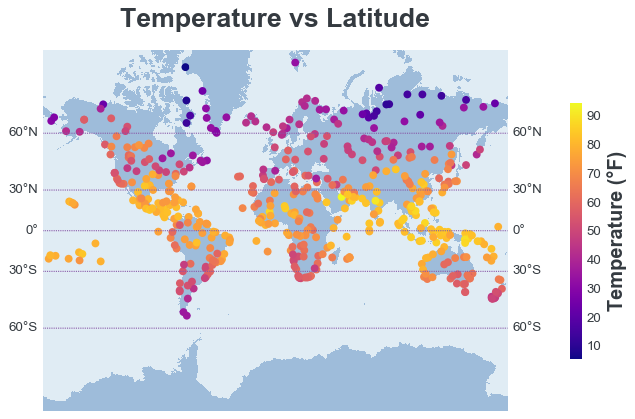

In [96]:
#set variables for viz1 to plot here
viz_title = title1
to_plot = temps
cmap_label = temps_label
plot_map(viz_title, to_plot, cmap_label, lng, lat)

# Humidity (%) vs. Latitude

In [21]:
title2 = 'Humidity vs Latitude'
humidity = cities_df['Humidity'].values
numidity_label = 'Humidity (%)'

/Users/yegor3/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4995: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):


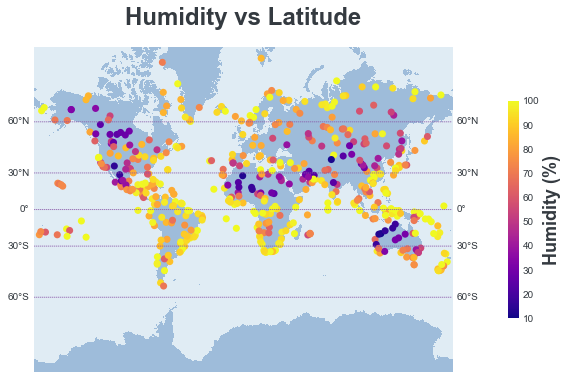

In [22]:
#set variables for viz2 to plot here
viz_title = title2
to_plot = humidity
cmap_label = numidity_label
plot_map(viz_title, to_plot, cmap_label, lng, lat)

# Cloudiness (%) vs. Latitude

In [23]:
title3 = 'Cloudiness vs Latitude'
clouds = cities_df['Clouds'].values
clouds_label = 'Clouds (%)'

/Users/yegor3/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4995: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):


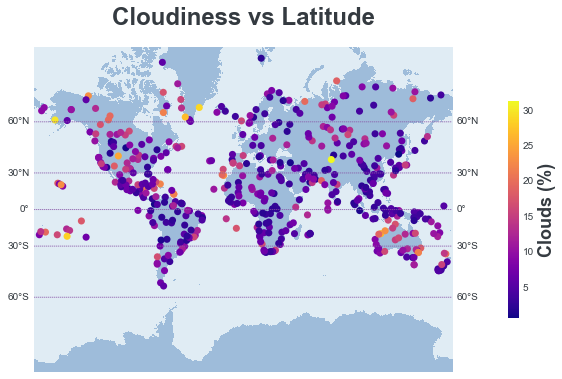

In [24]:
#set variables for viz2 to plot here
viz_title = title3
to_plot = clouds
cmap_label = clouds_label
plot_map(viz_title, to_plot, cmap_label, lng, lat)

# Wind Speed (mph) vs. Latitude

In [25]:
title4 = 'Wind Speed vs Latitude'
wind = cities_df['Wind Speed MPH'].values
wind_label = 'Wind Speed (MPH)'

/Users/yegor3/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4995: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):


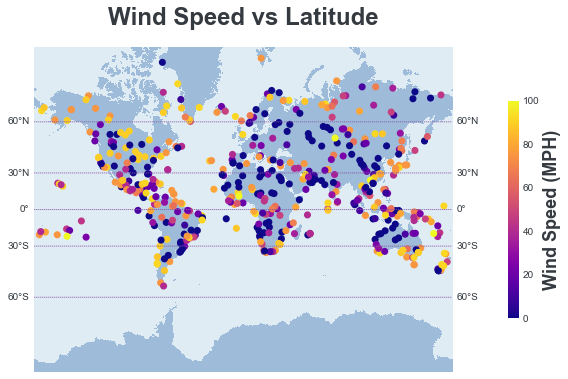

In [26]:
#set variables for viz2 to plot here
viz_title = title4
to_plot = wind
cmap_label = wind_label
plot_map(viz_title, to_plot, cmap_label, lng, lat)

# Scatterplots using Seaborn

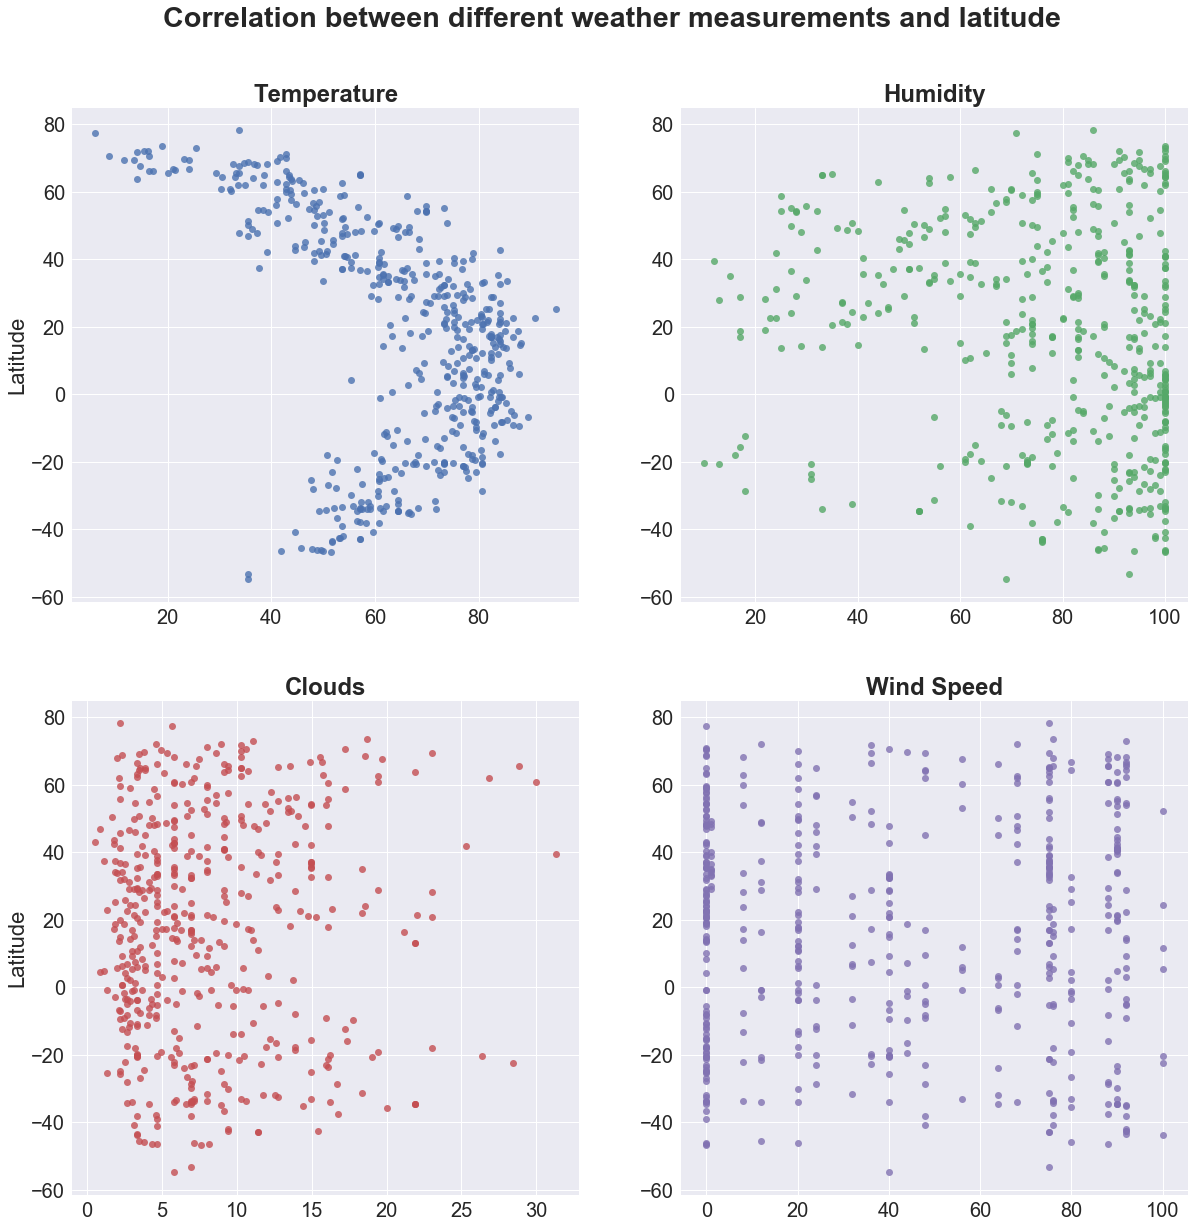

In [34]:
import seaborn as sns
f, axes = plt.subplots(ncols=2,nrows=2,figsize=(20,20))

sns.set_style('darkgrid')
sns.regplot('Temperature, imperial','Latitude',data=cities_df,fit_reg=False, ax=axes[0,0])
sns.regplot('Humidity','Latitude',data=cities_df,fit_reg=False, ax=axes[0,1])
sns.regplot('Clouds','Latitude',data=cities_df,fit_reg=False, ax=axes[1,0])
sns.regplot('Wind Speed MPH','Latitude',data=cities_df,fit_reg=False, ax=axes[1,1])

sns.set(font_scale=2)
axes[0,0].set_title('Temperature', fontweight='bold')
axes[0,1].set_title('Humidity', fontweight='bold')
axes[1,0].set_title('Clouds', fontweight='bold')
axes[1,1].set_title('Wind Speed', fontweight='bold')

plt.suptitle('Correlation between different weather measurements and latitude', fontweight='bold', y=.95)

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[1,0].set_xlabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')

f.savefig('img/all.png',dpi=150,transparent=False,bbox_inches='tight',pad_inches=0.5)

plt.show()

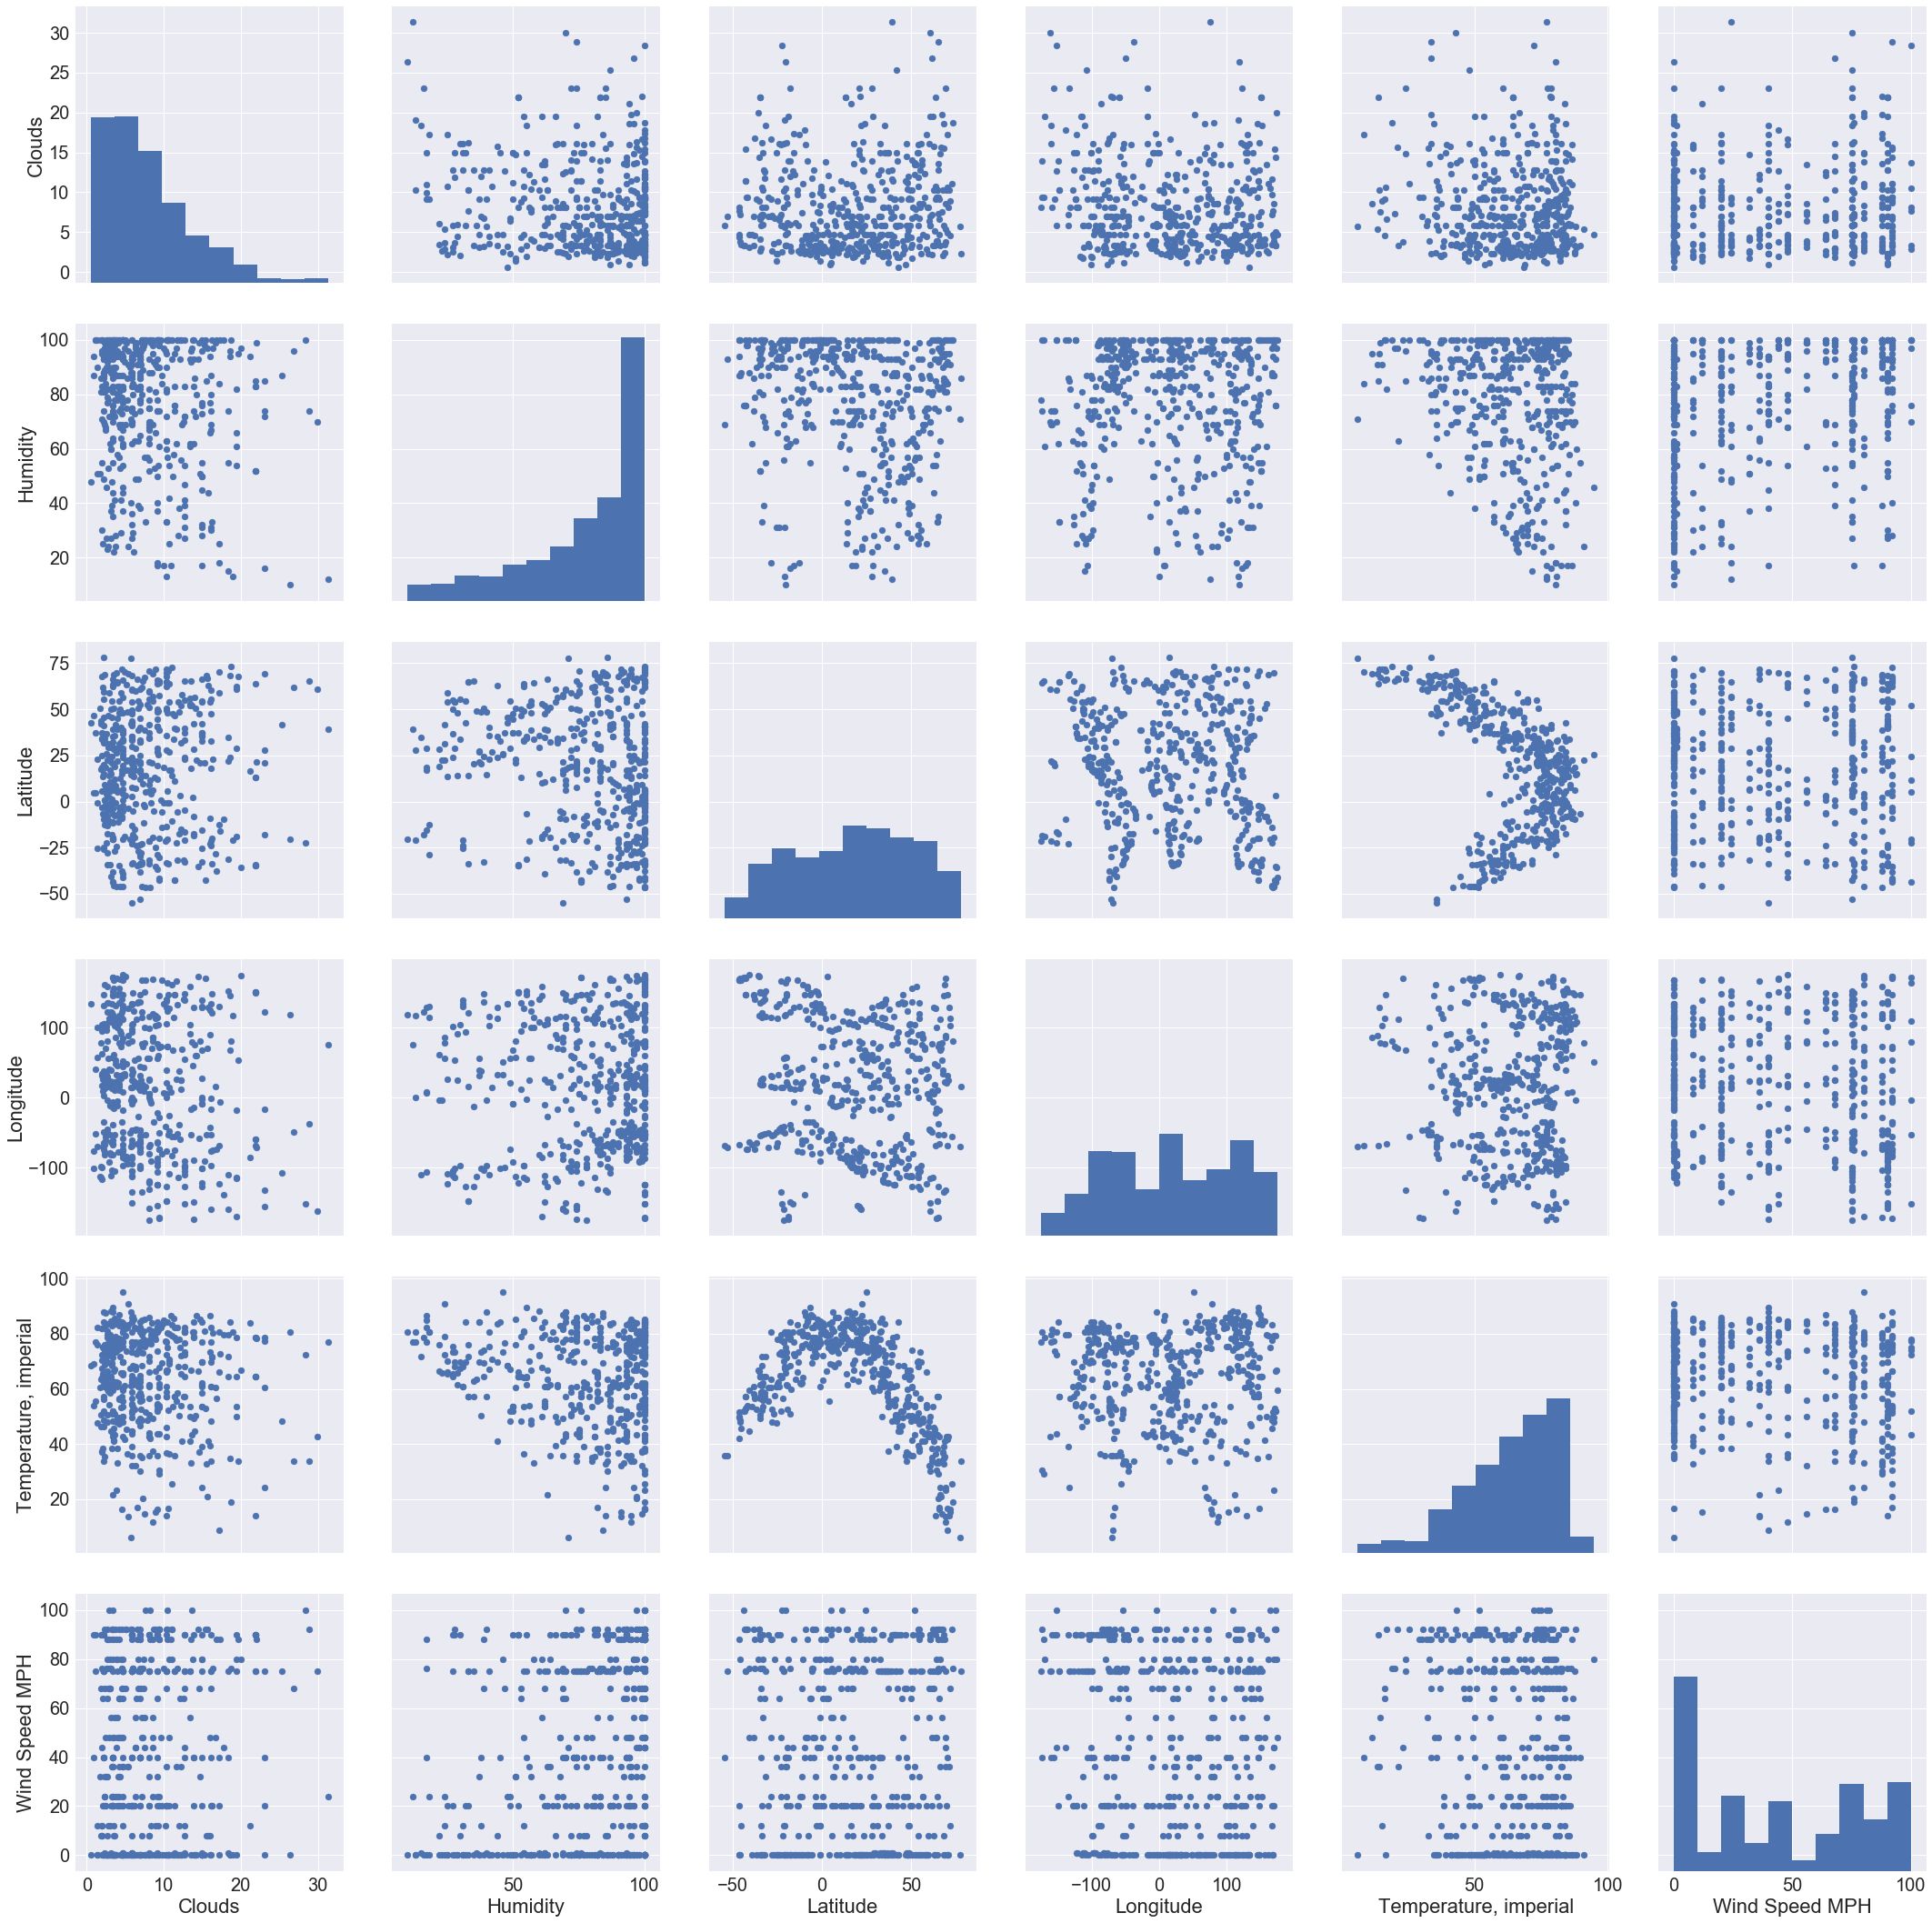

In [61]:
#f, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
g = sns.PairGrid(cities_df,size=5)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
g.savefig('img/pairgrid.png',dpi=150,transparent=False,bbox_inches='tight',pad_inches=0.5)

# Trends
* Temperatures are higher around equator
* Humidity is higher alongside cost lines and big rivers
* Amount of clouds is about the same around the globe
* Wind speed seems to be all over